<a href="https://colab.research.google.com/github/hemanthchintha/Melanoma_Detection_Assignment/blob/main/Hemanth_S_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [18]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [19]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [20]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/app/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/app/Test")

In [21]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [22]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [23]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size)
for data, labels in train_ds.take(1):
    print(data.shape)
    print(labels.shape)
    

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
(32, 180, 180, 3)
(32,)


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size)
for data, labels in val_ds.take(1):
    print(data.shape)
    print(labels.shape)

Found 118 files belonging to 9 classes.
Using 95 files for training.
(32, 180, 180, 3)
(32,)


In [24]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

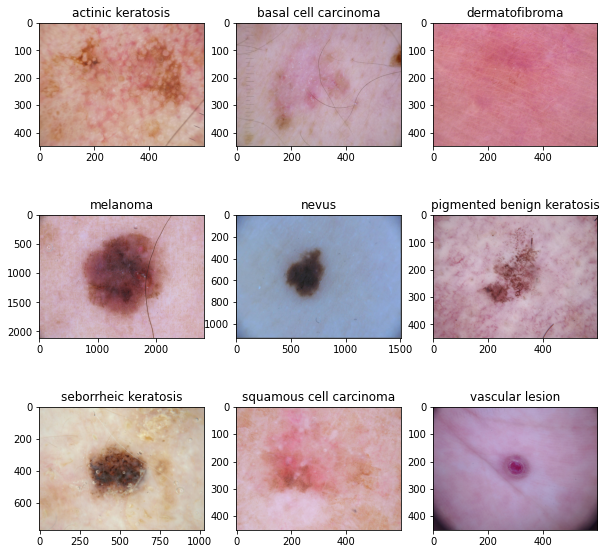

In [25]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [26]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [27]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [28]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [29]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model

In [30]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,  
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 214s 133ms/step - loss: 2.0621 - accuracy: 0.1959 - val_loss: 2.1626 - val_accuracy: 0.1158
Epoch 2/20
56/56 [==============================] - 4s 74ms/step - loss: 1.9256 - accuracy: 0.2807 - val_loss: 2.1981 - val_accuracy: 0.1684
Epoch 3/20
56/56 [==============================] - 4s 74ms/step - loss: 1.8809 - accuracy: 0.2824 - val_loss: 2.3463 - val_accuracy: 0.2000
Epoch 4/20
56/56 [==============================] - 4s 73ms/step - loss: 1.7728 - accuracy: 0.3410 - val_loss: 2.1353 - val_accuracy: 0.2105
Epoch 5/20
56/56 [==============================] - 4s 73ms/step - loss: 1.6792 - accuracy: 0.3783 - val_loss: 2.0606 - val_accuracy: 0.2211
Epoch 6/20
56/56 [==============================] - 4s 73ms/step - loss: 1.6141 - accuracy: 0.4157 - val_loss: 2.2255 - val_accuracy: 0.2526
Epoch 7/20
56/56 [==============================] - 4s 73ms/step - loss: 1.5594 - accuracy: 0.4369 - val_loss: 2.1040 - val_accuracy: 0.2842
Epoch 8/20
56/56 [===

### Visualizing training results

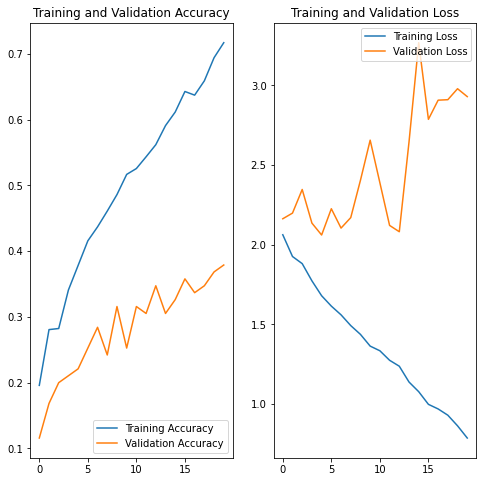

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

*  Low accuracy.
* Thre is a overfitting in data

In [32]:
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

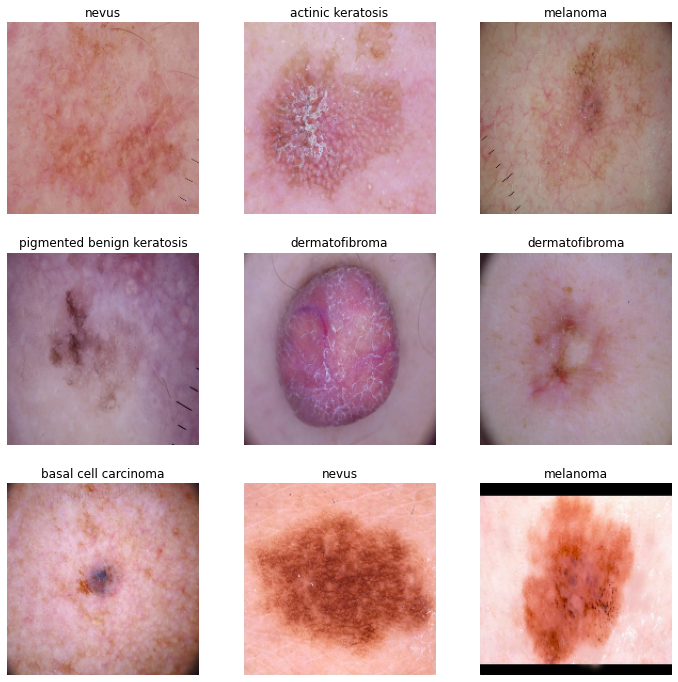

In [33]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [34]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))



### Compiling the model

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [36]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 8s 106ms/step - loss: 1.9993 - accuracy: 0.2645 - val_loss: 2.1579 - val_accuracy: 0.2211
Epoch 2/20
56/56 [==============================] - 6s 100ms/step - loss: 1.7155 - accuracy: 0.3811 - val_loss: 2.6462 - val_accuracy: 0.2947
Epoch 3/20
56/56 [==============================] - 6s 100ms/step - loss: 1.7538 - accuracy: 0.3694 - val_loss: 2.1048 - val_accuracy: 0.3368
Epoch 4/20
56/56 [==============================] - 6s 102ms/step - loss: 1.5810 - accuracy: 0.4459 - val_loss: 1.9830 - val_accuracy: 0.2842
Epoch 5/20
56/56 [==============================] - 6s 106ms/step - loss: 1.5851 - accuracy: 0.4481 - val_loss: 2.2900 - val_accuracy: 0.2316
Epoch 6/20
56/56 [==============================] - 6s 100ms/step - loss: 1.5465 - accuracy: 0.4777 - val_loss: 2.1752 - val_accuracy: 0.3895
Epoch 7/20
56/56 [==============================] - 6s 100ms/step - loss: 1.4926 - accuracy: 0.4743 - val_loss: 1.9177 - val_accuracy: 0.3579
Epoch 

### Visualizing the results

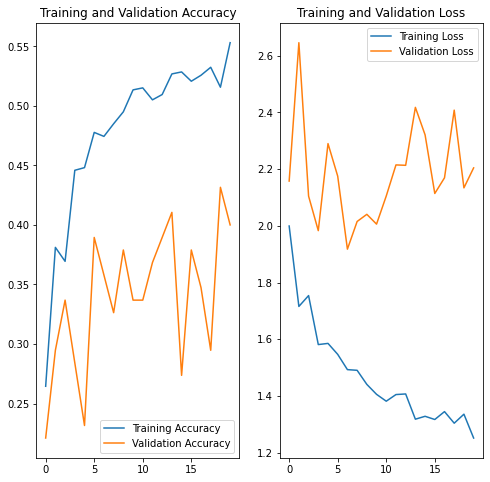

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

* There is a improvement in  validation accuracy





In [38]:
path=[]
lesion=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path.append(str(j))
        lesion.append(i)
dataframe_dict_original = dict(zip(path, lesion))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/app/Train/actinic kera...,actinic keratosis
1,/content/gdrive/MyDrive/app/Train/actinic kera...,actinic keratosis
2,/content/gdrive/MyDrive/app/Train/actinic kera...,actinic keratosis
3,/content/gdrive/MyDrive/app/Train/actinic kera...,actinic keratosis
4,/content/gdrive/MyDrive/app/Train/actinic kera...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/app/Train/vascular les...,vascular lesion
2235,/content/gdrive/MyDrive/app/Train/vascular les...,vascular lesion
2236,/content/gdrive/MyDrive/app/Train/vascular les...,vascular lesion
2237,/content/gdrive/MyDrive/app/Train/vascular les...,vascular lesion


<BarContainer object of 9 artists>

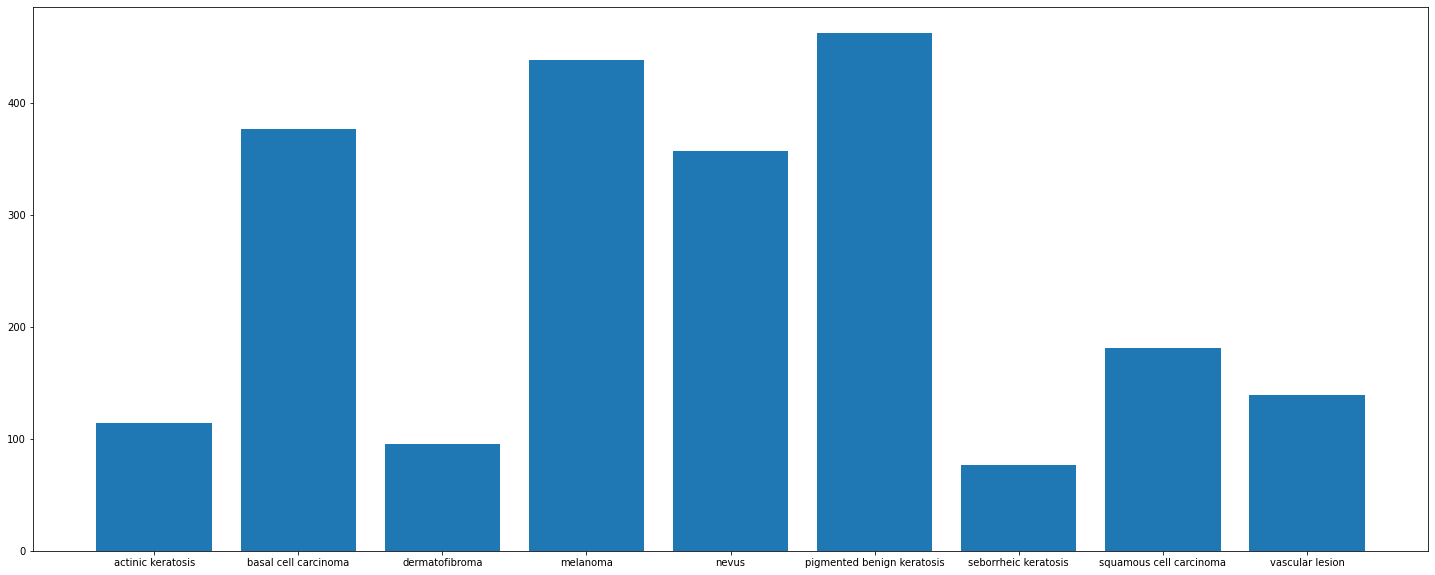

In [39]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
ans -   squamous cell carcinoma has least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
ans -melanoma and pigmented benign keratosis have proprtionate number of classes.


In [40]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [42]:
path_to_training_dataset="/content/gdrive/MyDrive/app/Train"

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset,save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)    

Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F16698C8940>: 100%|██████████| 500/500 [00:39<00:00, 12.60 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F166AFFFD60>: 100%|██████████| 500/500 [00:46<00:00, 10.82 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F166F07D460>: 100%|██████████| 500/500 [00:48<00:00, 10.22 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F166B143D90>: 100%|██████████| 500/500 [00:43<00:00, 11.49 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7F166B0AA550>: 100%|██████████| 500/500 [00:38<00:00, 12.94 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F166F100130>: 100%|██████████| 500/500 [00:51<00:00,  9.64 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F16860B4760>: 100%|██████████| 500/500 [00:54<00:00,  9.10 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F16861EDA30>: 100%|██████████| 500/500 [00:46<00:00, 10.76 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/app/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F166B031E80>: 100%|██████████| 500/500 [00:46<00:00, 10.75 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [43]:

data_dir_train1 = pathlib.Path("/content/gdrive/MyDrive/app/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [45]:

for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path.append(str(j))
        lesion.append(i)
dataframe_dict_original = dict(zip(path, lesion))
df1 = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
df1

,Path,Label
0,/content/gdrive/MyDrive/app/Train/actinic kera...,actinic keratosis
1,/content/gdrive/MyDrive/app/Train/actinic kera...,actinic keratosis
2,/content/gdrive/MyDrive/app/Train/actinic kera...,actinic keratosis
3,/content/gdrive/MyDrive/app/Train/actinic kera...,actinic keratosis
4,/content/gdrive/MyDrive/app/Train/actinic kera...,actinic keratosis
...,...,...
6734,/content/gdrive/MyDrive/app/Train/output/vascu...,vascular lesion
6735,/content/gdrive/MyDrive/app/Train/output/vascu...,vascular lesion
6736,/content/gdrive/MyDrive/app/Train/output/vascu...,vascular lesion
6737,/content/gdrive/MyDrive/app/Train/output/vascu...,vascular lesion


### Lets see the distribution of augmented data after adding new images to the original training data.

In [48]:
df1['Label'].value_counts()

pigmented benign keratosis    1370
melanoma                      1312
basal cell carcinoma          1154
nevus                         1076
squamous cell carcinoma        547
vascular lesion                418
actinic keratosis              344
dermatofibroma                 283
seborrheic keratosis           235
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [70]:
batch_size = 32
img_height = 180
img_width = 180

In [71]:
import pathlib
data_dir_train1="/content/gdrive/MyDrive/app/Train/output"


#### **Todo:** Create a training dataset

In [72]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("/content/gdrive/MyDrive/app/Train/output")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train1,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


In [73]:
data_dir_train1="/content/gdrive/MyDrive/app/Train/output"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [74]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset ="validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [76]:

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [77]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [78]:
epochs =50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


113/113 [==============================] - 23s 190ms/step - loss: 1.9863 - accuracy: 0.2508 - val_loss: 1.8871 - val_accuracy: 0.2856
Epoch 2/50
113/113 [==============================] - 22s 190ms/step - loss: 1.7637 - accuracy: 0.3583 - val_loss: 1.6710 - val_accuracy: 0.3933
Epoch 3/50
113/113 [==============================] - 21s 177ms/step - loss: 1.5570 - accuracy: 0.4453 - val_loss: 1.6356 - val_accuracy: 0.4033
Epoch 4/50
113/113 [==============================] - 21s 173ms/step - loss: 1.4998 - accuracy: 0.4661 - val_loss: 1.4155 - val_accuracy: 0.5011
Epoch 5/50
113/113 [==============================] - 21s 176ms/step - loss: 1.4174 - accuracy: 0.5017 - val_loss: 1.4473 - val_accuracy: 0.4744
Epoch 6/50
113/113 [==============================] - 21s 174ms/step - loss: 1.3720 - accuracy: 0.5061 - val_loss: 1.3447 - val_accuracy: 0.5389
Epoch 7/50
113/113 [==============================] - 21s 175ms/step - loss: 1.2478 - accuracy: 0.5625 - val_loss: 1.3902 - val_accuracy: 0.5

#### **Todo:**  Visualize the model results

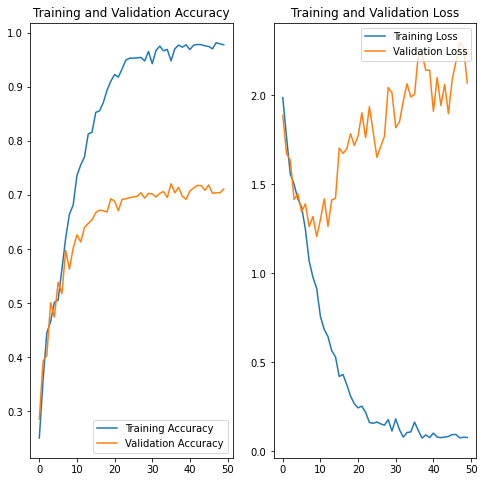

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



* Accuracy of training data has improved
* Still data overfitting is there.
* To get better output , increase number of neurons and layers and hyper parameter tuning